# Coordinate systems

Linear coordinates:

- `coord_cartesian()`: the default Cartesian coordinate system
- `coord_flip()`: Cartesian coordinate system with x and y axes flipped
- `coord_fixed()`: Cartesian coordinate system with a fixed aspect ratio

non-linear coordinates:

- `coord_map()`/`coord_quickmap()`: Map projections
- `coord_polar()`: Polar coordinates
- `coord_trans()`: Apply arbitrary transformations to x and y positions, after the data has been processed by the stat

## Linear coordinate systems

### Zooming into a plot with coord_cartesian()

also has arguments `xlim` and `ylim`, will keep all the data, not like the `scale_()`

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)
options(warn=-1)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180, width=0) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    if (width>0){
        options(repr.plot.width=width, repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)
    } else{
        options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)   
    }

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8)),
    legend.key.size = unit(2.2,'mm')
)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 196 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 196 rows containing missing values (geom_point)."`geom_smooth()` using method = 'loess' and formula 'y ~ x'


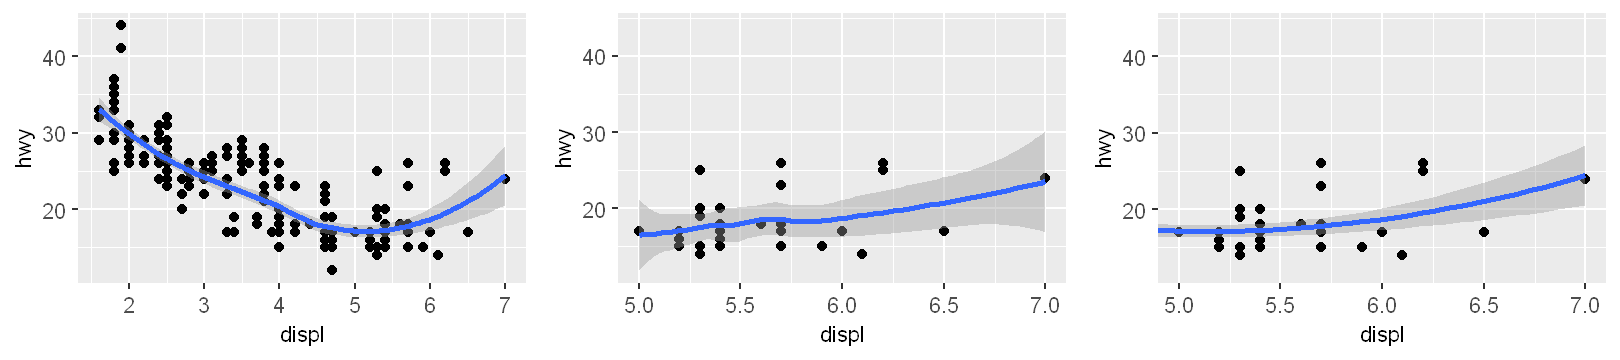

In [2]:
base <- ggplot(mpg, aes(displ, hwy)) + 
geom_point() + 
geom_smooth() + myTheme

base2 <- base + scale_x_continuous(limits = c(5, 7))
base3 <- base + coord_cartesian(xlim = c(5, 7))

multiplot(base,base2,base3,ncol = 3)

### Flipping the axes with coord_flip()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


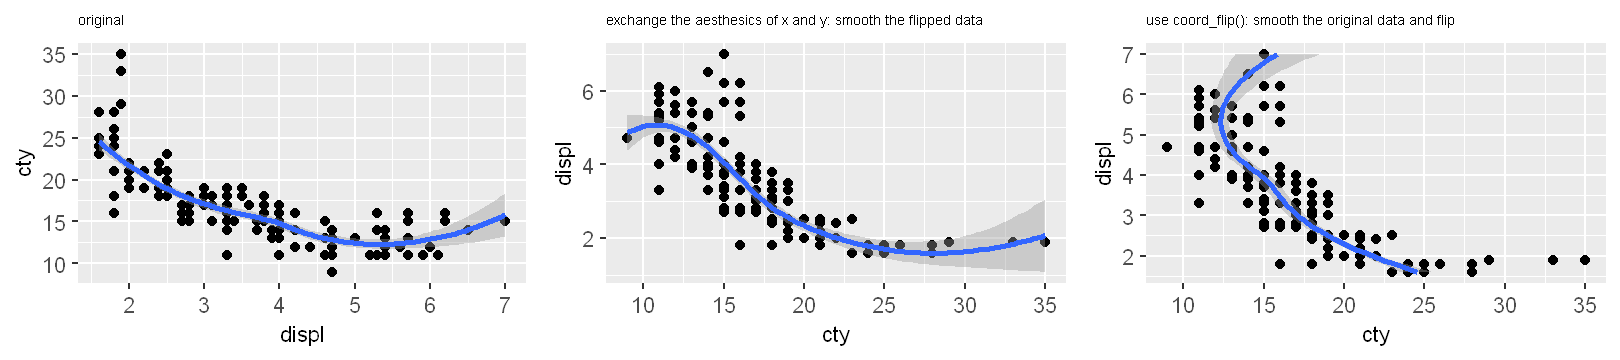

In [3]:
p1 <- ggplot(mpg, aes(displ, cty)) + 
geom_point() + 
geom_smooth() + myTheme + ggtitle("original")
p2 <- ggplot(mpg, aes(cty, displ)) + 
geom_point() + 
geom_smooth() + myTheme + ggtitle("exchange the aesthesics of x and y: smooth the flipped data")
p3 <- ggplot(mpg, aes(displ, cty)) + 
geom_point() + 
geom_smooth() + 
coord_flip() + myTheme + ggtitle("use coord_flip(): smooth the original data and flip")

multiplot(p1,p2,p3,ncol = 3)

### Equal scales with coord_fixed()

see documentation

## Non-linear coordinate systems

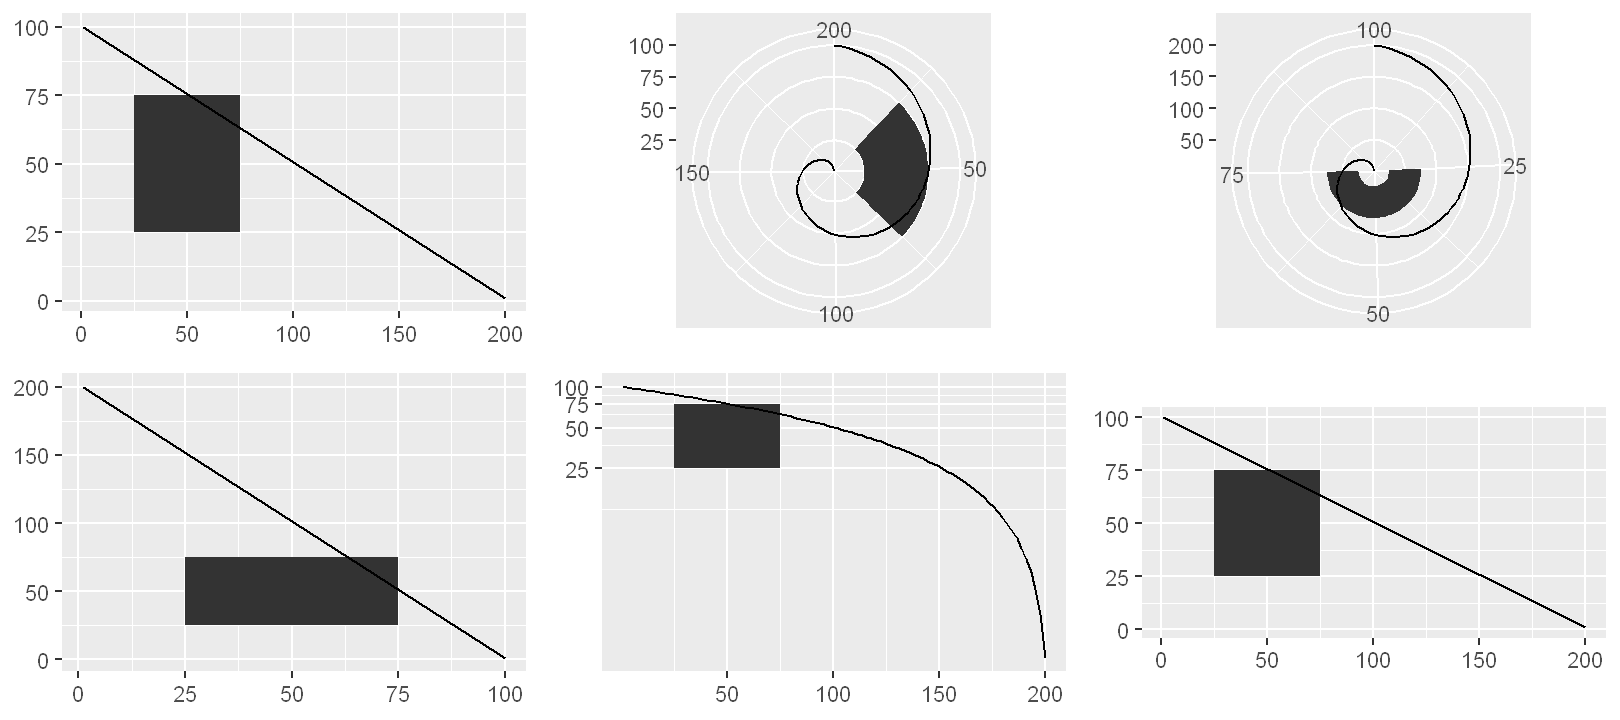

In [4]:
rect <- data.frame(x = 50, y = 50)
line <- data.frame(x = c(1, 200), y = c(100, 1))
base <- ggplot(mapping = aes(x, y)) + 
geom_tile(data = rect, aes(width = 50, height = 50)) + 
geom_line(data = line) + 
xlab(NULL) + ylab(NULL) + myTheme
base2 <- base + coord_polar("x")
base3 <- base + coord_polar("y")

p1 <- base + coord_flip()
p2 <- base + coord_trans(y = "log10")
p3 <- base + coord_fixed()

multiplot(base,base2,base3,p1,p2,p3,ncol = 3)

Process of transformation from linear to nonlinear: **munching**

1. get location-based representation, like the points
2. transform each location into the new coordinate system, point by point
3. connect those points in new system

See the illustration bellow

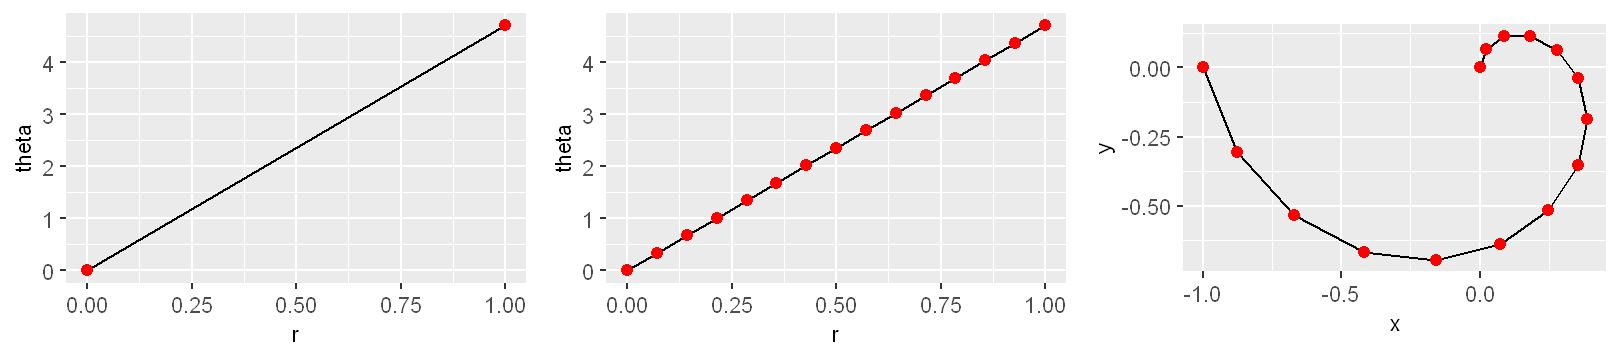

In [5]:
df <- data.frame(r = c(0, 1), theta = c(0, 3 / 2 * pi))
p1 <- ggplot(df, aes(r, theta)) + 
geom_line() + 
geom_point(size = 2, colour = "red") + myTheme

interp <- function(rng, n) {
    seq(rng[1], rng[2], length = n)
}
munched <- data.frame(
    r = interp(df$r, 15),
    theta = interp(df$theta, 15)
)

p2 <- ggplot(munched, aes(r, theta)) + 
geom_line() + 
geom_point(size = 2, colour = "red") + myTheme

transformed <- transform(munched,
    x = r * sin(theta),
    y = r * cos(theta)
)

p3 <- ggplot(transformed, aes(x, y)) + 
geom_path() + 
geom_point(size = 2, colour = "red") + 
coord_fixed() + myTheme

multiplot(p1,p2,p3,ncol=3)

### Transformations with coord_trans()

- Transforming at the scale level， occurs before statistics are computed and does not change the shape of the geom
- Transforming at the coordinate system level, occurs after the statistics and effect the shape of the geom

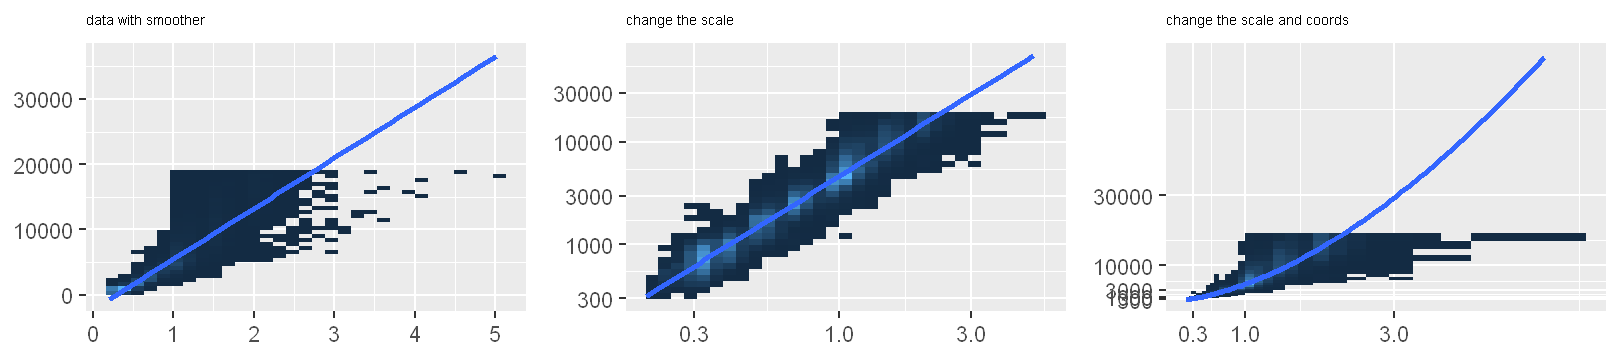

In [9]:
options(warn=-1)
base <- ggplot(diamonds, aes(carat, price)) + 
stat_bin2d() + 
geom_smooth(method = "lm") + 
xlab(NULL) + 
ylab(NULL) + 
theme(legend.position = "none") + myTheme + ggtitle("data with smoother")

# Better fit on log scale, but harder to interpret
base2 <- base +
scale_x_log10() + 
scale_y_log10() + ggtitle("change the scale")

# Fit on log scale, then backtransform to original.
# Highlights lack of expensive diamonds with large carats
pow10 <- scales::exp_trans(10)
base3 <- base +
scale_x_log10() + 
scale_y_log10() + 
coord_trans(x = pow10, y = pow10) + ggtitle("change the scale and coords")

multiplot(base,base2,base3,ncol = 3)

### Polar coordinates with coord_polar()

say a bar to a pie chart

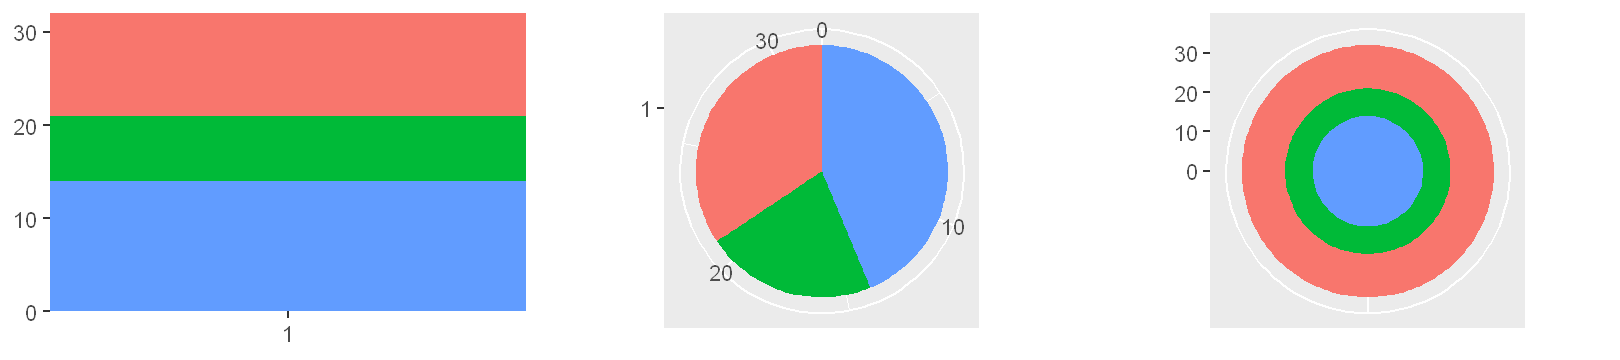

In [10]:
base <- ggplot(mtcars, aes(factor(1), fill = factor(cyl))) +
geom_bar(width = 1) + 
theme(legend.position = "none") + 
scale_x_discrete(NULL, expand = c(0, 0)) +
scale_y_continuous(NULL, expand = c(0, 0)) + myTheme
base2 <- base + coord_polar(theta = "y")
base3 <- base + coord_polar()

multiplot(base,base2,base3,ncol = 3)

### Map projections with coord_map()

- `coord_quickmap()` for small region: ensure that 1m of latitude and longitude are the samein the middle of the plot
- `coord_map()` uses the `mapproj` package. Arguments are same with `mapproj::mapproject()`. Slower

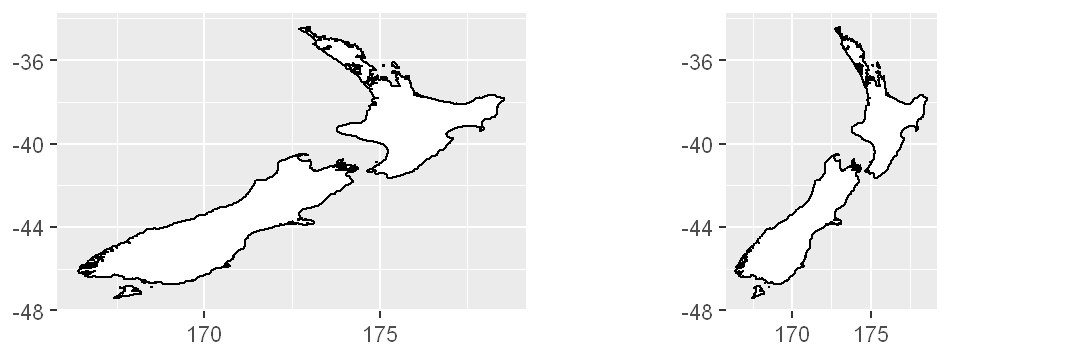

In [11]:
nzmap <- ggplot(map_data("nz"), aes(long, lat, group = group)) +
geom_polygon(fill = "white", colour = "black") +
xlab(NULL) + ylab(NULL) + myTheme

nzmap2 <- nzmap + coord_quickmap()

multiplot(nzmap,nzmap2,ncol=2)